In [1]:
from nilearn.datasets import fetch_abide_pcp
from nilearn import plotting
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

from data.ABIDEProcessing import get_subjectIDs, fetch_filenames, \
                             get_timeseries, get_subject_connectivity, ROOT_FOLDER

from utils.visualize import visualization
from data.PhenotypicData import PhenoDataProcessing

from src.build import Adj_matrix

In [2]:
EXEC = False        # Turn to True if you download the dataset for the first time

if EXEC : 
    abide_data_dir = './data/' + 'ABIDE_dataset'       
    num_subjects = 871       # Number of subjects for the ABIDE dataset


    abide_data = fetch_abide_pcp(data_dir = abide_data_dir,
                                n_subjects = num_subjects, 
                                pipeline = 'cpac',
                                derivatives = ['rois_ho'], 
                                quality_checked = True, 
                                verbose = 1,
                                band_pass_filtering = True,
                                global_signal_regression=False)

In [3]:
# Get the subjects IDs
subjectIDs = get_subjectIDs()
# Get the filename associated to each subject
fileNames = fetch_filenames(subject_IDs = subjectIDs)

## Get the time series 
time_series = get_timeseries(subjectIDs, fileNames)

Loading time series: 100%|██████████| 871/871 [00:15<00:00, 55.53it/s]


In [4]:
## Build the connectivity matrix for each subject
for i in tqdm(range(len(subjectIDs)), total = len(subjectIDs), desc = "Saving the connectivity matrices"):
    _ = get_subject_connectivity(time_series[i], subjectID = subjectIDs[i]) 

Saving the connectivity matrices: 100%|██████████| 871/871 [00:04<00:00, 206.38it/s]


$$ \textbf{Visualization of the Time Series and Connectivity Matrix} $$ 

We define
$Sim(S_{v}, S_{w})$ as the correlation distance between the subjects’ rs-fMRI connectivity networks after feature selection, as a separation between ASD and controls
can be observed within certain sites

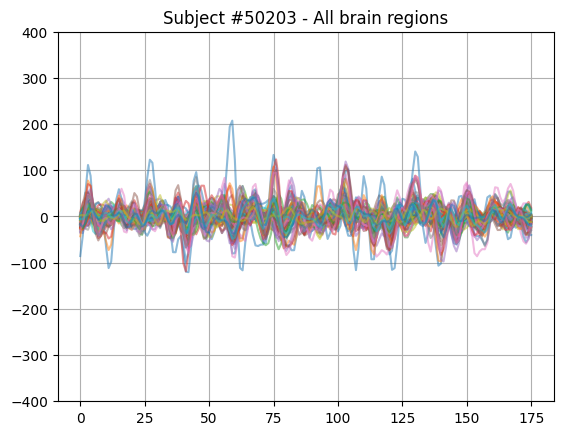

In [5]:
## Setup the visualization class
vis = visualization(subjectIDs = subjectIDs, time_series = time_series, root_folder = ROOT_FOLDER)

# Plot the time series for one subject
vis.plot_ts(idx = 120)

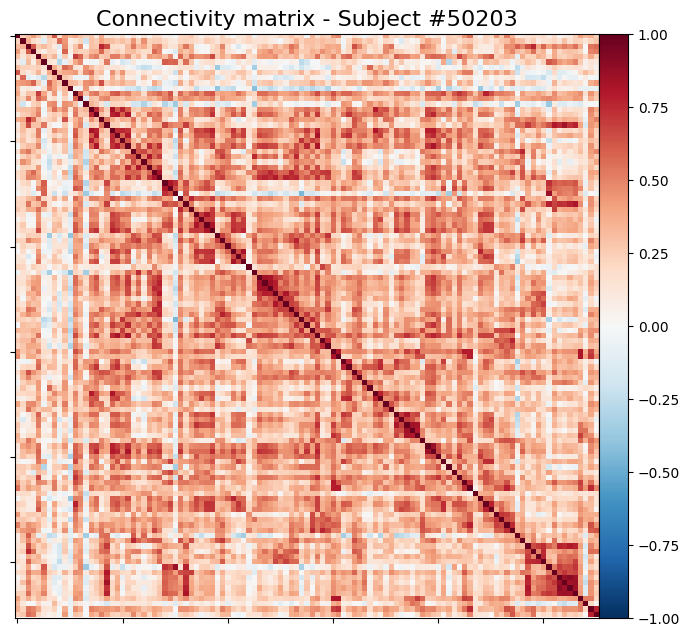

In [6]:
# Visualize the connectivity matrix for one subject
vis.plot_connectivity_matrix(idx = 120)

$$ \textbf{Phenotypic data} $$ 

In [7]:
pdp = PhenoDataProcessing(root_folder = ROOT_FOLDER)

## Extract the phenotypic Dataframe associated to the 871 studied patients
df = pdp.extract_subjects(subjectIDs = subjectIDs)

print(f"The size of the phenotypic DataFrame is {df.shape}")

## First visualization of the DataFrame
df.head()

The size of the phenotypic DataFrame is (871, 106)


,Unnamed: 0.1,Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
2,2,3,50004,3,50004,PITT,Pitt_0050004,1,1,19.09,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
4,4,5,50006,5,50006,PITT,Pitt_0050006,1,1,13.37,...,NaN,OK,NaN,maybe,ic-parietal slight,OK,NaN,OK,NaN,1
5,5,6,50007,6,50007,PITT,Pitt_0050007,1,1,17.78,...,NaN,OK,NaN,maybe,ic-cerebellum_temporal_lob,OK,NaN,OK,NaN,1


$$ \textbf{Adjacency matrix} $$

In [18]:
adj = Adj_matrix(subjectIDs = subjectIDs, root_folder = ROOT_FOLDER, sort_var = ['SITE_ID'])

In [19]:
adjacency_matrix = adj.compute_adjacency_matrix(nb_features = 2000)

Computing the score matrix on the phenotypic features ...


Building Score matrix: 100%|██████████| 871/871 [01:36<00:00,  9.00it/s]


DONE
Computing the correlation matrix on the similarities ...


Retrieving the connectivity matrices: 100%|██████████| 871/871 [00:00<00:00, 1566.89it/s]
c:\Users\yanis\OneDrive\Bureau\M2 MVA\S1\Geometric Data Analysis\MVA-Geometric_Data_Analysis\src\build.py:70: RuntimeWarning: divide by zero encountered in arctanh
  norm_networks = [np.arctanh(mat) for mat in self.all_networks]


Fitting estimator with 6105 features.
Fitting estimator with 6005 features.
Fitting estimator with 5905 features.
Fitting estimator with 5805 features.
Fitting estimator with 5705 features.
Fitting estimator with 5605 features.
Fitting estimator with 5505 features.
Fitting estimator with 5405 features.
Fitting estimator with 5305 features.
Fitting estimator with 5205 features.
Fitting estimator with 5105 features.
Fitting estimator with 5005 features.
Fitting estimator with 4905 features.
Fitting estimator with 4805 features.
Fitting estimator with 4705 features.
Fitting estimator with 4605 features.
Fitting estimator with 4505 features.
Fitting estimator with 4405 features.
Fitting estimator with 4305 features.
Fitting estimator with 4205 features.
Fitting estimator with 4105 features.
Fitting estimator with 4005 features.
Fitting estimator with 3905 features.
Fitting estimator with 3805 features.
Fitting estimator with 3705 features.
Fitting estimator with 3605 features.
Fitting esti

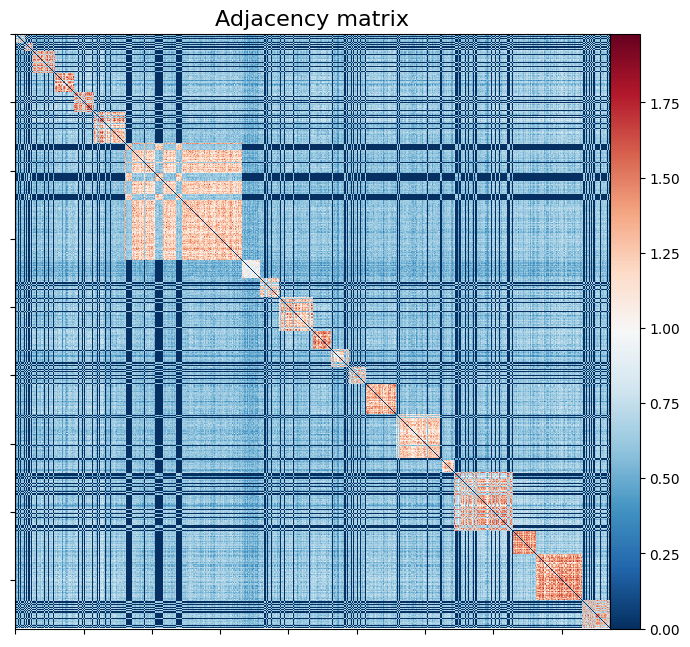

In [22]:
plotting.plot_matrix(adjacency_matrix,
                     title = "Adjacency matrix", 
                     figure = (7,7))
plt.show()

La proportion de patients atteints d'autisme est de 0.4626865671641791
La proportion de patients sains est de 0.5373134328358209


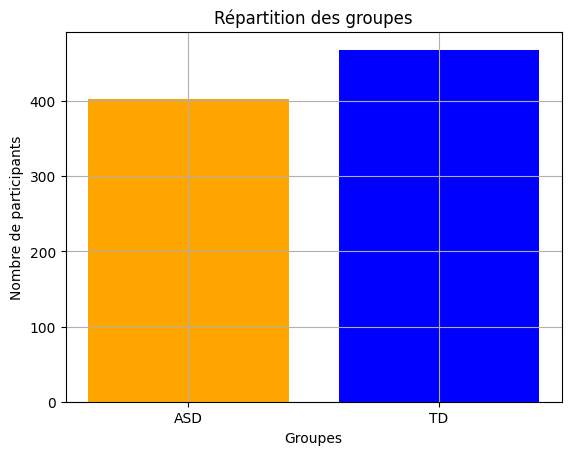

In [35]:
## Comparaison de la répartition des classes (sujets sain et malades)
# DX_GROUP = 1 : Patient atteint d'autisme
# DX_GROUP = 2 : Patient sain
count = df['DX_GROUP'].value_counts()

print(f"La proportion de patients atteints d'autisme est de {count[1]/sum(count)}")
print(f"La proportion de patients sains est de {count[2]/sum(count)}")

plt.bar(count.index, count.values, color=['blue', 'orange'], tick_label=['TD', 'ASD'])
plt.xlabel('Groupes')
plt.ylabel('Nombre de participants')
plt.grid()
plt.title('Répartition des groupes')
plt.show()

$$ \textbf{Création des ensembles d'entrainement, validation et test} $$ 